<a href="https://colab.research.google.com/github/Kinzibarn/IS_4487/blob/main/wk8_9_KB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 7 Script

## Objectives

What do you need to know for this module's project?

1.  Use the model to predict on a new dataset (without the target), then use these predictions to identify those who should be called--a contact list.
2.  Make a recommendation to the Director of Sales based on your analytic work.

**NOTE:** For the module 7 project you will predict answering for prospective customers (who have not yet been called). Consequently, the assignment requires an additional dataset, customer_data.csv, that you will need to download and move into your project folder.  Here is code to load that data into memory after you have it saved in your project folder (your working directory). This code is included in the template script.

We will again use the MegaTelCo data for this demonstration.

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics  #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/adviseinvest.csv')


Mounted at /content/gdrive


In [3]:
#look at the top rows
df.head(10) 

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0
5,1,14030,0,28,2,1,1,0,1.0,0,0,2,0,4
6,1,9320,0,24,2,1,0,1,0.0,3,0,2,0,2
7,1,11750,0,68,0,1,0,0,1.0,1,0,0,0,3
8,1,69670,0,36,3,1,1,0,0.0,1,1,3,0,4
9,1,3380,0,52,2,1,0,1,0.0,0,2,4,0,4


In [4]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  int64  
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 3.2 MB


In [5]:
#describe the data before cleaning it
df.describe()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,0.054230,34.770065,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458175,0.091106,1.535792
std,0.497829,29379.202710,0.226475,11.355777,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497353,0.287765,1.625916
min,0.000000,-65600.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


## Clean up the data

In [14]:
#delete rows with outlier data and remove negative income; put it in a new dataframe
df_clean = df[(df['num_accts'] < 4) & (df['income']>0) ]

#delete any rows with missing values in the clean dataframe
df_clean = df_clean.dropna() 

df_clean.describe()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,22523.000000,22523.000000,22523.000000,22523.000000,22523.000000,22523.000000,22523.000000,22523.000000,22523.000000,22523.000000,22523.000000,22523.000000,22523.000000,22523.000000
mean,0.528349,33521.172135,0.051059,32.455268,1.863650,1.113662,0.230165,0.693114,0.238645,1.468499,0.863162,1.832216,0.076677,1.363539
std,0.499207,28559.921841,0.220123,10.104612,0.664615,0.317407,0.420947,0.461212,0.426265,1.228968,1.415410,0.880855,0.266084,1.516498
min,0.000000,2760.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13820.000000,0.000000,25.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,23230.000000,0.000000,30.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,40385.000000,0.000000,36.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,2.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,4.000000


# Convert attributes to factors

- job
-  checking account
- saving account
- product


In [15]:
df_clean['job'] = df['job'].astype('category')
df_clean['chk_acct'] = df['chk_acct'].astype('category')
df_clean['sav_acct'] = df['sav_acct'].astype('category')
df_clean['product'] = df['product'].astype('category')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22523 entries, 0 to 29502
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   answered        22523 non-null  int64   
 1   income          22523 non-null  int64   
 2   female          22523 non-null  int64   
 3   age             22523 non-null  int64   
 4   job             22523 non-null  category
 5   num_dependents  22523 non-null  int64   
 6   rent            22523 non-null  int64   
 7   own_res         22523 non-null  int64   
 8   new_car         22523 non-null  float64 
 9   chk_acct        22523 non-null  category
 10  sav_acct        22523 non-null  category
 11  num_accts       22523 non-null  int64   
 12  mobile          22523 non-null  int64   
 13  product         22523 non-null  category
dtypes: category(4), float64(1), int64(9)
memory usage: 2.0 MB


In [16]:
print(df['answered'].value_counts()[1])

16128


# Turn answered code 0/1 into yes or no

In [20]:
df_clean['answered'] = df_clean['answered'].astype('category')

In [17]:
df_clean['answered'] = df_clean['answered'].map({1:'yes', 0:'no'})
df_clean.head(10)

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,yes,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,no,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
3,no,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
5,yes,14030,0,28,2,1,1,0,1.0,0,0,2,0,4
6,yes,9320,0,24,2,1,0,1,0.0,3,0,2,0,2
7,yes,11750,0,68,0,1,0,0,1.0,1,0,0,0,3
8,yes,69670,0,36,3,1,1,0,0.0,1,1,3,0,4
10,yes,40200,0,27,2,1,0,1,0.0,0,0,2,0,2
11,yes,14730,0,39,2,1,0,1,0.0,3,0,1,0,4
12,no,68500,0,34,3,2,0,1,1.0,1,1,0,0,0


In [18]:
df_clean.head(5)

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,yes,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,no,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
3,no,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
5,yes,14030,0,28,2,1,1,0,1.0,0,0,2,0,4
6,yes,9320,0,24,2,1,0,1,0.0,3,0,2,0,2


#Plot answered vs num_acct

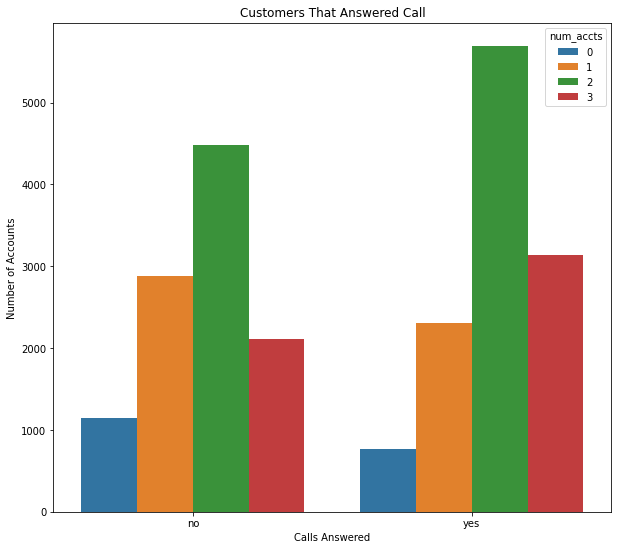

In [30]:
# Plot "answered" against "num_accts". 

#create a bar chart, histogram, or scatter for at least three variables, showing their relationship with the target variable
# I am choosing bar chart

plt.figure(figsize=(10, 9))
sns.countplot(data=df_clean, x='answered', hue='num_accts')
plt.title('Customers That Answered Call')
plt.xlabel('Calls Answered')
plt.ylabel('Number of Accounts')
  # Add a border to the bars
edgecolor = 'black'
plt.show()

#Question 2 barplot mobile phones to answered

In [21]:
#1 turn mobile into categorical variable
df_clean['mobile'] = df_clean['mobile'].astype('category')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22523 entries, 0 to 29502
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   answered        22523 non-null  category
 1   income          22523 non-null  int64   
 2   female          22523 non-null  int64   
 3   age             22523 non-null  int64   
 4   job             22523 non-null  category
 5   num_dependents  22523 non-null  int64   
 6   rent            22523 non-null  int64   
 7   own_res         22523 non-null  int64   
 8   new_car         22523 non-null  float64 
 9   chk_acct        22523 non-null  category
 10  sav_acct        22523 non-null  category
 11  num_accts       22523 non-null  int64   
 12  mobile          22523 non-null  category
 13  product         22523 non-null  category
dtypes: category(6), float64(1), int64(7)
memory usage: 1.7 MB


In [22]:
#table that counts for answered at each level of mobile
df_clean.value_counts(["answered", "mobile"])


answered  mobile
yes       0         10621
no        0         10175
yes       1          1279
no        1           448
dtype: int64

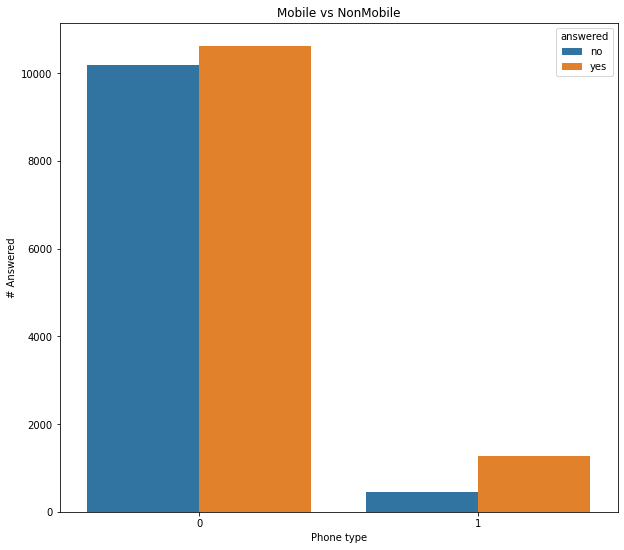

In [29]:
plt.figure(figsize=(10, 9))
sns.countplot(data=df_clean, x='mobile', hue='answered')
plt.title('Mobile vs NonMobile')
plt.xlabel('Phone type')
plt.ylabel('# Answered')
  # Add a border to the bars
edgecolor = 'black'
plt.show()